In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
d = pd.read_csv('winequality-red.csv')

In [5]:
d.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
d.shape

(1599, 12)

In [7]:
d.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
d.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
d.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
d.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

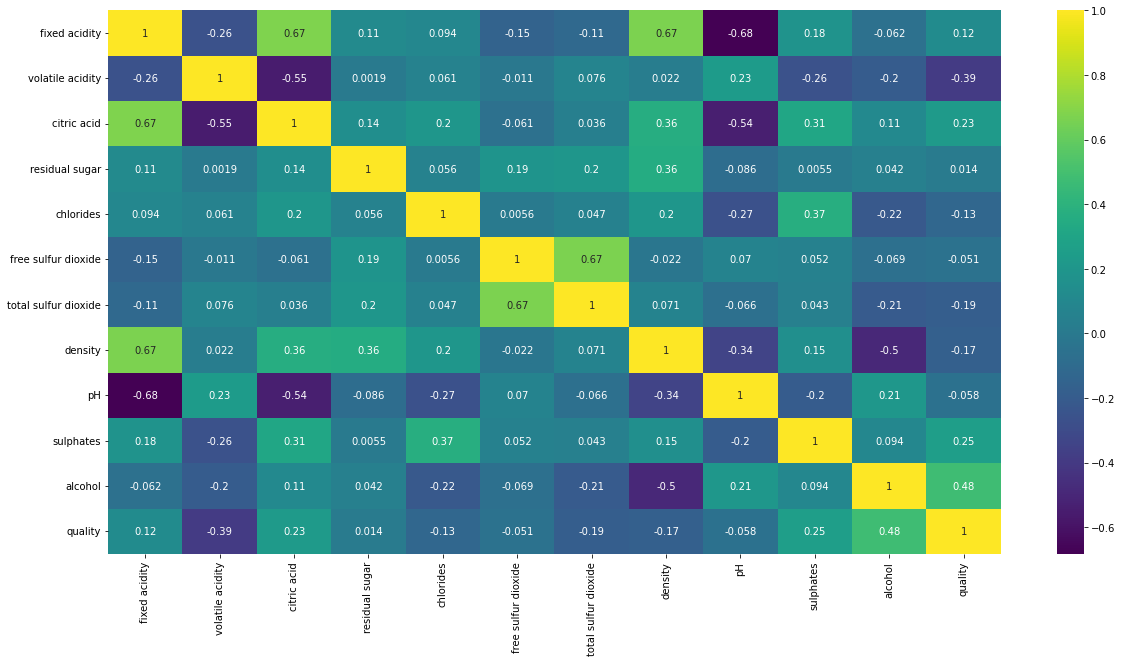

In [12]:
cor = d.corr()
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(cor,annot = True,cmap = 'viridis')

In [13]:
d['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

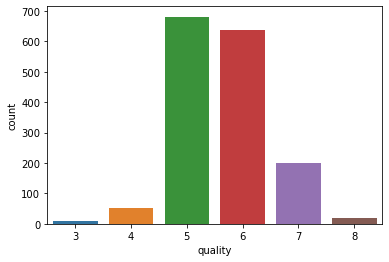

In [14]:
sns.countplot(d['quality'])

fixed acidity              AxesSubplot(0.125,0.749828;0.133621x0.130172)
volatile acidity        AxesSubplot(0.285345,0.749828;0.133621x0.130172)
citric acid              AxesSubplot(0.44569,0.749828;0.133621x0.130172)
residual sugar          AxesSubplot(0.606034,0.749828;0.133621x0.130172)
chlorides               AxesSubplot(0.766379,0.749828;0.133621x0.130172)
free sulfur dioxide        AxesSubplot(0.125,0.593621;0.133621x0.130172)
total sulfur dioxide    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
density                  AxesSubplot(0.44569,0.593621;0.133621x0.130172)
pH                      AxesSubplot(0.606034,0.593621;0.133621x0.130172)
sulphates               AxesSubplot(0.766379,0.593621;0.133621x0.130172)
alcohol                    AxesSubplot(0.125,0.437414;0.133621x0.130172)
quality                 AxesSubplot(0.285345,0.437414;0.133621x0.130172)
dtype: object

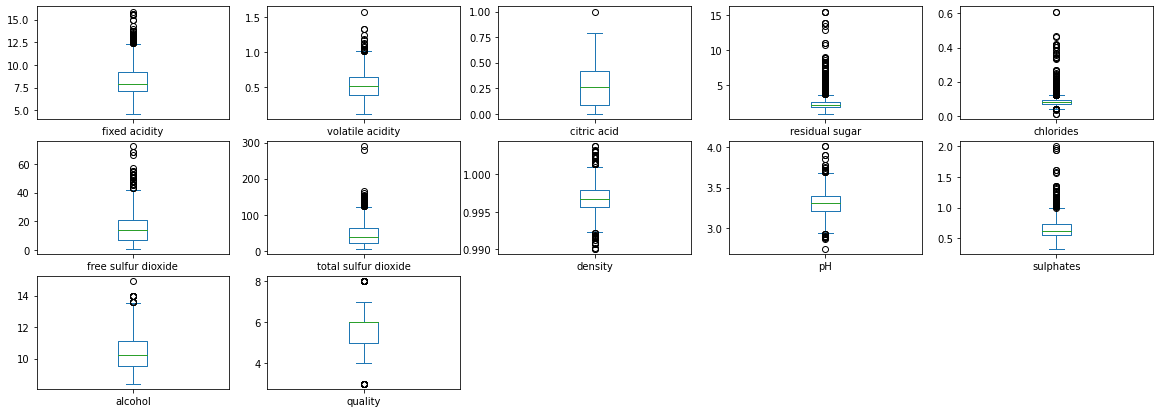

In [15]:
fig,ax = plt.subplots(figsize=(20,12))
d.plot(kind ='box',subplots = True, layout =(5,5),sharex = False,ax=ax)

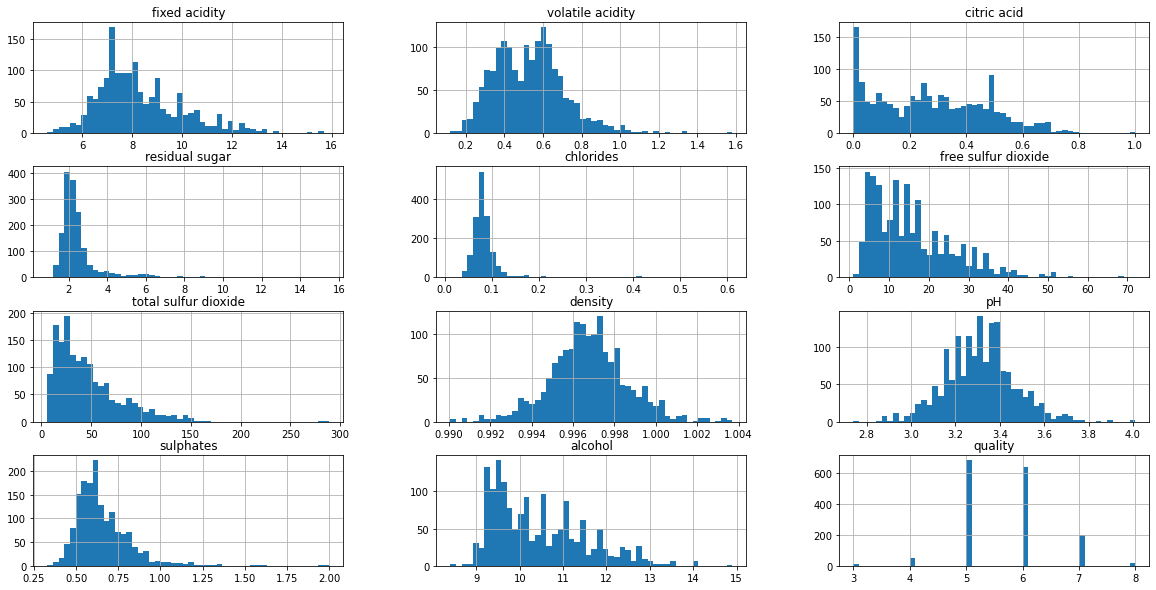

In [16]:
d.hist(figsize=(20,10),bins=50)
plt.show()

In [17]:
d['quality_scale'] = [1 if x >= 7 else 0 for x in d['quality']]
d.quality_scale.value_counts()

0    1382
1     217
Name: quality_scale, dtype: int64

In [18]:
X = d.drop(['quality','quality_scale'], axis = 1)
Y = d['quality_scale']

In [19]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [20]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality_scale, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pre = model.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Logistic Regression")
print("Accuracy Score : ", accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))

Logistic Regression
Accuracy Score :  0.86875
[[403  10]
 [ 53  14]]


In [23]:
n = np.arange(30)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
param_grid = {'n_neighbors' : n}
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'n_neighbors': 2}


In [24]:
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(x_train,y_train)
y_pre = model.predict(x_test)

print("KNeighborsClassifier")
print("Accuracy Score : ", accuracy_score(y_test,y_pre))
print(confusion_matrix(y_test,y_pre))

KNeighborsClassifier
Accuracy Score :  0.85625
[[402  11]
 [ 58   9]]


In [25]:
from sklearn import svm
model = svm.SVC()
model.fit(x_train,y_train)
pre = model.predict(x_test)

print("Accuracy Score : ", accuracy_score(y_test,pre))
print(confusion_matrix(y_test,pre))

Accuracy Score :  0.8625
[[413   0]
 [ 66   1]]


In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score: 0.8520833333333333
[[372  41]
 [ 30  37]]


In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score: 0.84375
[[357  56]
 [ 19  48]]


In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score: 0.8916666666666667
[[395  18]
 [ 34  33]]


In [29]:
data = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest'],
    'Score': [0.864583,0.85625,0.8625,0.852083,0.84375,0.89166]})

In [30]:
data

,Model,Score
0,Logistic Regression,0.864583
1,KNN,0.856250
2,SVC,0.862500
3,Decision Tree,0.852083
4,GaussianNB,0.843750
5,Random Forest,0.891660


In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

result = pd.DataFrame({
    'Test Data' : y_test,
    'Predicted Data' : y_pred
})
result.tail()

,Test Data,Predicted Data
1468,1,1
495,1,1
1325,0,0
514,1,0
576,0,0
